In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [39]:
df = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [41]:
df["class"].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [42]:
df["class"]= [1 if each == "Normal" else 0 for each in df["class"]]
df["class"].value_counts()

class
0    210
1    100
Name: count, dtype: int64

# Normalization

In [43]:
y = df["class"].values
x_data = df.drop(["class"],axis=1)
x_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [44]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.172453,0.078237,0.117940,0.119956,0.255425,0.025148
1,0.116655,0.049160,0.083970,0.093236,0.292047,0.036365
2,0.185964,0.077459,0.142342,0.134245,0.272446,0.017523
3,0.187046,0.083126,0.128886,0.129660,0.262864,0.051838
4,0.141459,0.048208,0.091656,0.118992,0.277529,0.044173
...,...,...,...,...,...,...
305,0.137248,0.057437,0.109539,0.105551,0.299131,0.015858
306,0.151291,0.073975,0.093758,0.103057,0.291955,0.024761
307,0.168772,0.078569,0.133213,0.115944,0.318269,0.019437
308,0.131077,0.045976,0.122535,0.110842,0.301684,0.026240


In [45]:
x.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.166561,0.066576,0.146622,0.125726,0.300229,0.086952
std,0.040122,0.023297,0.043189,0.031245,0.030999,0.087428
min,0.086606,0.010482,0.058329,0.056855,0.188875,0.000000
25%,0.133818,0.050571,0.111867,0.103364,0.283443,0.029474
50%,0.162358,0.063817,0.141109,0.124448,0.301038,0.053133
75%,0.195381,0.077231,0.172388,0.148403,0.317797,0.121847
max,0.327960,0.140805,0.318436,0.308397,0.405328,1.000000


# Test-Train split

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
y_train

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

# Prediction

In [48]:
prediction = knn.predict(x_test)
print('accuracy is: ',knn.score(x_test,y_test))

accuracy is:  0.8064516129032258


## Finding the most optimized "k" value

In [51]:
accuracys = []
interval = np.arange(1, 25)

for i in interval:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    accuracys.append(knn.score(x_train, y_train))
    
    

In [52]:
accuracys

[1.0,
 0.9308755760368663,
 0.9078341013824884,
 0.8986175115207373,
 0.8940092165898618,
 0.8894009216589862,
 0.8894009216589862,
 0.9124423963133641,
 0.8894009216589862,
 0.880184331797235,
 0.8847926267281107,
 0.880184331797235,
 0.8847926267281107,
 0.8847926267281107,
 0.8617511520737328,
 0.8755760368663594,
 0.8663594470046083,
 0.8663594470046083,
 0.8755760368663594,
 0.8755760368663594,
 0.8755760368663594,
 0.8847926267281107,
 0.8663594470046083,
 0.8663594470046083]

## Visualization part

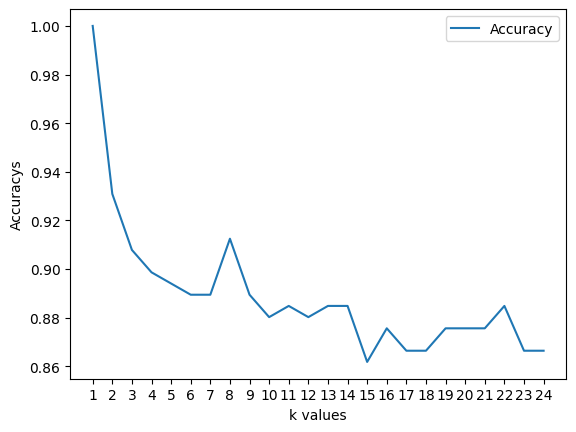

In [58]:
import matplotlib.pyplot as plt
plt.plot(interval, accuracys, label = 'Accuracy')
plt.xlabel('k values')
plt.ylabel('Accuracys')
plt.legend()
plt.xticks(interval)
plt.show()